The following line installs pyspedas, so this notebook can be used in Google Colab.  If you're running in an environment where pyspedas is already installed, you can comment out or skip this command.

In [1]:
!pip install pyspedas
!pip install ipympl


[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


The following line may also be needed in Google Colab, to pick up newly installed packages.  

In [2]:
exit()

In [1]:
%matplotlib widget

In [2]:
import pyspedas

In [3]:
from pyspedas.cluster.load_csa import load_csa

In [5]:
load_csa(datatypes=['CP_CIS-HIA_PAD_HS_MAG_IONS_PF'])

03-Oct-24 15:28:44: Downloading Cluster data, please wait....
03-Oct-24 15:29:27: Download complete.
03-Oct-24 15:29:28: Variable instrument__C1_CQ_CIS-HIA_CAVEATS is marked non-record-varying, but has DEPEND_0 attribute
03-Oct-24 15:29:28: CDF DEPEND_0 attribute time_range__C1_CQ_CIS-HIA_CAVEATS for variable instrument__C1_CQ_CIS-HIA_CAVEATS is multidimensional with shape (1, 2), skipping
03-Oct-24 15:29:28: Variable caveat_key__C1_CQ_CIS-HIA_CAVEATS is marked non-record-varying, but has DEPEND_0 attribute
03-Oct-24 15:29:28: CDF DEPEND_0 attribute time_range__C1_CQ_CIS-HIA_CAVEATS for variable caveat_key__C1_CQ_CIS-HIA_CAVEATS is multidimensional with shape (1, 2), skipping
03-Oct-24 15:29:28: Variable caveat__C1_CQ_CIS-HIA_CAVEATS is marked non-record-varying, but has DEPEND_0 attribute
03-Oct-24 15:29:28: CDF DEPEND_0 attribute time_range__C1_CQ_CIS-HIA_CAVEATS for variable caveat__C1_CQ_CIS-HIA_CAVEATS is multidimensional with shape (1, 2), skipping


['duration__C1_CP_CIS_HIA_PAD_HS_MAG_IONS_PF',
 'cis_mode__C1_CP_CIS_HIA_PAD_HS_MAG_IONS_PF',
 'tm_product__C1_CP_CIS_HIA_PAD_HS_MAG_IONS_PF',
 'Differential_Particle_Flux__C1_CP_CIS_HIA_PAD_HS_MAG_IONS_PF']

In [6]:
from pyspedas import get_data, store_data, options, tplot

In [7]:
data = get_data('Differential_Particle_Flux__C1_CP_CIS_HIA_PAD_HS_MAG_IONS_PF')
metadata = get_data('Differential_Particle_Flux__C1_CP_CIS_HIA_PAD_HS_MAG_IONS_PF', metadata=True)

In [8]:
metadata['CDF']['VATT']

{'CATDESC': 'Differential_Particle_Flux',
 'FIELDNAM': 'Differential_Particle_Flux',
 'UNITS': 'Particles cm^-2 s^-1 sr^-1 Kev^-1',
 'SI_conversion': '6.2415E+19>(particles) m^-2 s^-1 sr^-1 J^-1',
 'LABLAXIS': 'Differential_Particle_Flux',
 'FILLVAL': -1e+31,
 'VALIDMIN': 0.0,
 'VALIDMAX': 1308900000.0,
 'FORMAT': 'F11',
 'VAR_TYPE': 'data',
 'sig_digits': 5,
 'DEPEND_0': 'time_tags__C1_CP_CIS_HIA_PAD_HS_MAG_IONS_PF',
 'QUALITY': 'quality_PAD__C1_CP_CIS-HIA_QUALITY',
 'ENTITY': 'Ion',
 'PROPERTY': 'Differential_Particle_Flux',
 'DEPEND_1': 'pitch_angle__C1_CP_CIS_HIA_PAD_HS_MAG_IONS_PF',
 'DEPEND_2': 'energy_table__C1_CP_CIS_HIA_PAD_HS_MAG_IONS_PF',
 'DISPLAY_TYPE': 'spectrogram',
 'LABL_PTR_1': 'Metadata_pitch_angle__C1_CP_CIS_HIA_PAD_HS_MAG_IONS_PF',
 'LABL_PTR_2': 'Metadata_energy_table__C1_CP_CIS_HIA_PAD_HS_MAG_IONS_PF'}

So the pitch angles are:

In [9]:
data.v1

array([  5.625,  16.875,  28.125,  39.375,  50.625,  61.875,  73.125,
        84.375,  95.625, 106.875, 118.125, 129.375, 140.625, 151.875,
       163.125, 174.375], dtype=float32)

And the energies are:

In [10]:
data.v2

array([2.889833e+04, 2.172822e+04, 1.633712e+04, 1.228363e+04,
       9.235880e+03, 6.944320e+03, 5.221330e+03, 3.925840e+03,
       2.951780e+03, 2.219400e+03, 1.668730e+03, 1.254690e+03,
       9.433900e+02, 7.093200e+02, 5.333200e+02, 4.010000e+02,
       3.015000e+02, 2.267000e+02, 1.704500e+02, 1.281600e+02,
       9.636000e+01, 7.245000e+01, 5.448000e+01, 4.096000e+01,
       3.080000e+01, 2.316000e+01, 1.741000e+01, 1.309000e+01,
       9.840000e+00, 7.400000e+00, 5.560000e+00], dtype=float32)

In [11]:
data.y.shape

(4482, 16, 31)

Create time vs. energy by summing over the pitch angle dimension:

In [12]:
import numpy as np

en_flux = np.nansum(data.y, axis=1)

en_flux.shape

(4482, 31)

In [13]:
store_data('diff_part_flux', data={'x': data.times,
                                   'y': en_flux,
                                   'v': data.v2})

True

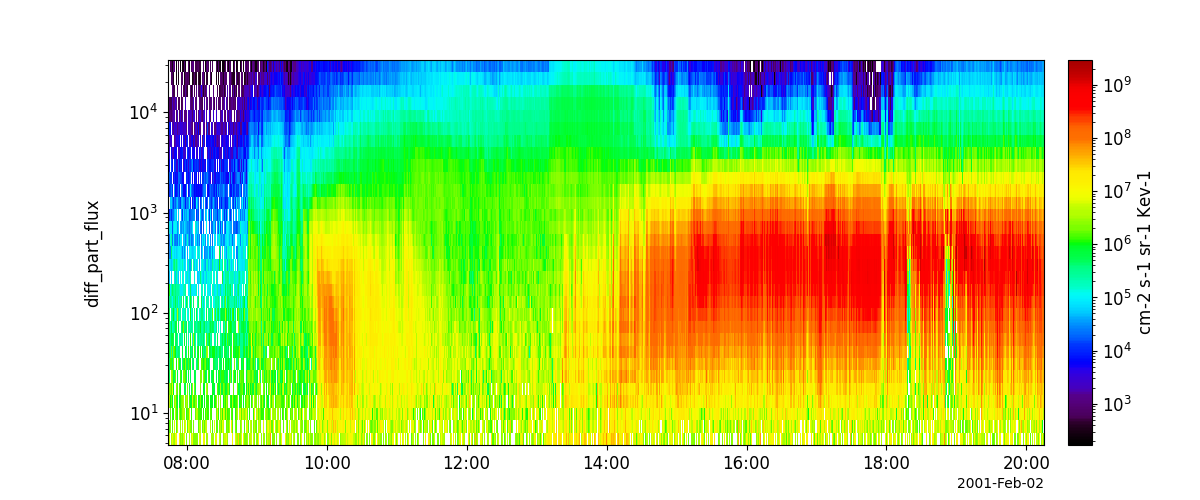

In [14]:
options('diff_part_flux', 'spec', True)
options('diff_part_flux', 'ylog', True)
options('diff_part_flux', 'zlog', True)
options('diff_part_flux', 'ztitle', 'cm^-2 s^-1 sr^-1 Kev^-1')

tplot('diff_part_flux')

Create pitch angle distribution:

In [40]:
pa_flux = np.nansum(data.y, axis=2)

pa_flux.shape

(4482, 16)

In [41]:
store_data('diff_part_flux_pa', data={'x': data.times,
                                      'y': pa_flux,
                                      'v': data.v1})

True

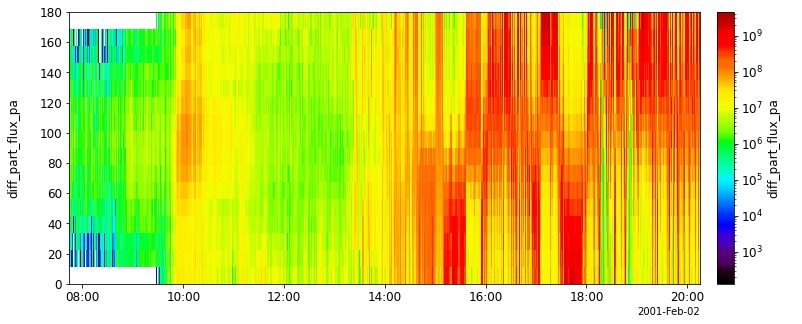

In [42]:
options('diff_part_flux_pa', 'spec', True)
options('diff_part_flux_pa', 'zlog', True)

tplot('diff_part_flux_pa')